In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Create a binary matrix representing student responses
binary_matrix = pd.read_csv("binary.csv")

# Define the desired number of clusters

In [2]:
binary_matrix

,s_name,g_sub1,g_sub2,g_sub3,a_sub1,a_sub2,a_sub3,h_sub1,h_sub2,h_sub3
0,abc,1,0,1,1,1,0,0,1,0
1,def,0,1,1,0,1,1,1,1,1
2,ghi,1,0,0,0,1,0,0,1,0
3,jkl,0,1,1,0,1,0,0,0,1
4,mno,0,0,1,1,1,1,1,0,1
5,pqr,1,1,0,0,1,1,1,0,1
6,stu,1,1,0,1,0,0,1,1,0
7,vwx,0,1,1,1,0,1,0,1,0
8,yza,1,1,1,0,1,1,0,0,0
9,dfg,1,0,1,0,1,0,0,0,1


In [3]:
binary_matrix.shape

(10, 10)

In [4]:
#import label encoder
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
binary_matrix["s_name"] = label_encoder.fit_transform(binary_matrix["s_name"])

In [5]:
binary_matrix

,s_name,g_sub1,g_sub2,g_sub3,a_sub1,a_sub2,a_sub3,h_sub1,h_sub2,h_sub3
0,0,1,0,1,1,1,0,0,1,0
1,1,0,1,1,0,1,1,1,1,1
2,3,1,0,0,0,1,0,0,1,0
3,4,0,1,1,0,1,0,0,0,1
4,5,0,0,1,1,1,1,1,0,1
5,6,1,1,0,0,1,1,1,0,1
6,7,1,1,0,1,0,0,1,1,0
7,8,0,1,1,1,0,1,0,1,0
8,9,1,1,1,0,1,1,0,0,0
9,2,1,0,1,0,1,0,0,0,1


In [6]:
X=binary_matrix.drop(['s_name'],axis=1)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X1=pca.fit_transform(X)
X1=pd.DataFrame(X1)

In [8]:
X1

,0,1
0,1.014900,-0.433295
1,-0.810087,0.706405
2,0.930584,-0.823589
3,-0.738232,-0.358880
4,-0.834683,0.405037
5,-0.748201,0.033687
6,1.189074,0.721086
7,0.523624,1.160701
8,-0.219244,-0.256428
9,-0.307735,-1.154725


In [9]:
K = 4

# Apply K-means clustering to the binary matrix
kmeans = KMeans(n_clusters=K, random_state=0).fit(X1)

# Print the cluster labels assigned to each student
print(kmeans.labels_)

# Interpret the clusters to identify common misconceptions or understanding among the students
# Refine the clusters by analyzing the responses of the students in each cluster to identify the specific misconceptions or understanding related to the concept
y_kmeans = kmeans.fit_predict(X1)
centroid=kmeans.cluster_centers_

[2 3 2 0 3 3 1 1 0 0]


In [10]:
centroid

array([[-0.42173716, -0.59001084],
       [ 0.8563489 ,  0.94089359],
       [ 0.97274207, -0.62844215],
       [-0.79765682,  0.38170989]])

In [11]:
print(kmeans.inertia_)

1.2665938861751795


In [12]:
pred=kmeans.predict(X1)
pred

array([2, 3, 2, 0, 3, 3, 1, 1, 0, 0])

In [13]:
label_0 = X1[pred == 0]
label_1 = X1[pred == 1]
label_2 = X1[pred == 2]
label_3 = X1[pred == 3]

In [14]:
label_0

,0,1
3,-0.738232,-0.358880
8,-0.219244,-0.256428
9,-0.307735,-1.154725


In [15]:
filtered_label0 = X1[pred == 0]
filtered_label1 = X1[pred == 1]
filtered_label2 = X1[pred == 2]
filtered_label3 = X1[pred == 3]

In [16]:
filtered_label1

,0,1
6,1.189074,0.721086
7,0.523624,1.160701


In [17]:
#a=filtered_label0[:,0:].values
x = filtered_label0.iloc[:,:-1].values
y = filtered_label0.iloc[:,-1].values

x1 = filtered_label1.iloc[:,:-1].values
y1 = filtered_label1.iloc[:,-1].values

x2 = filtered_label2.iloc[:,:-1].values
y2 = filtered_label2.iloc[:,-1].values

x3 = filtered_label3.iloc[:,:-1].values
y3 = filtered_label3.iloc[:,-1].values


In [18]:
y

array([-0.35887975, -0.25642771, -1.15472508])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


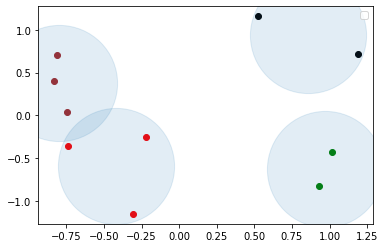

In [21]:
import matplotlib.pyplot as plt
 
 
#plotting the results
plt.scatter(x , y,color='red')
plt.scatter(x1 , y1,color='black')
plt.scatter(x2 , y2,color='green')
plt.scatter(x3 , y3,color='brown')
plt.scatter(centroid[:,0], centroid[:,1],s=13500,alpha=0.13)
plt.legend()
plt.show()

In [20]:
#Getting unique labels
 
u_labels = np.unique(pred)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(binary_matrix[pred == i , 0] , binary_matrix[pred == i , 1] , pred = i)
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False,  True, False, False, False, False,  True,
        True]), 0)